# Data Science and Visualization (RUC F2023)

## Lecture 4: Classification (I)

# Decision Tree and Random Forest on Titanic Dataset

You're supposed to fill in empty cells to finish the exercises. You may crate more cells whereever necessary.

## 1. Setup and load the data

In [3]:
import os
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


# You need to change according to where you put your data
titanic = pd.read_csv('../data/titanic.csv') 

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

## 2. Feature selection

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We obtain the needed columns only:

In [7]:
titanic = titanic.loc[:, ['Survived', 'Pclass', 'Sex', 'Age']]
titanic

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


We use the average age value to fill in the missing ages:

In [8]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

We also need to change the Sex string values to numbers: 1 for female and 0 for male:

In [9]:
titanic['Sex'] = np.where(titanic['Sex']=='female', 1, 0) 

In [10]:
titanic.isnull().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [12]:
titanic.info()
titanic.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')

To obtain the feature columns and the target variable (Survived column)...

In [16]:
feature_cols = titanic.columns.drop(['Survived'])
feature_cols

Index(['Pclass', 'Sex', 'Age'], dtype='object')

In [17]:
# Features
X = titanic[feature_cols]

# Target variable
y = titanic.Survived 

## 3. Splitting the data into training and test dets

In this case: 80% training and 20% test

In [18]:
# In this case: 70% training and 30% test
# If you use the same value for random_state in two different runs, you will get the data split in the same way.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
X_train.head()

,Pclass,Sex,Age
301,3,0,29.699118
309,1,1,30.000000
516,2,1,34.000000
120,2,0,21.000000
570,2,0,62.000000


In [20]:
X_test.head()

,Pclass,Sex,Age
862,1,1,48.000000
223,3,0,29.699118
84,2,1,17.000000
680,3,1,29.699118
535,2,1,7.000000


## 4. Building a decision tree model and use it to make predictions

1. Create the tree object.
2. Train/fit the tree to the training data.
2. Make predictions using the tree on the test data.

In [21]:
dtree = DecisionTreeClassifier()

In [23]:
dtree = dtree.fit(X_train, y_train)

In [25]:
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

## 5. Evaluating the Model

**Accuracy** for the decision tree:

In [26]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.776536312849162


**Recall** for the class label 1:

In [27]:
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.6164383561643836


**Precision** for the class label 1:

In [28]:
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 0.7894736842105263


### Confusion matrix

The original, plain confusion matrix:

In [29]:
metrics.confusion_matrix(y_test.values, y_pred)

array([[94, 12],
       [28, 45]], dtype=int64)

We can also plot the confusion matrix:

c:\Users\mathi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


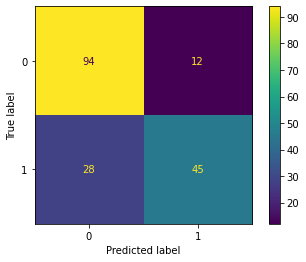

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

## 6. Optimizing Decision Trees

Create a number of trees by varying the arguments, e.g., criteria, splitter and max_depth:

In [33]:
feature_cols

Index(['Pclass', 'Sex', 'Age'], dtype='object')

In [34]:
dtree.classes_

array([0, 1], dtype=int64)

In [39]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# Export each tree into a .dot file
#file_path_name = "{0}-{1}.png".format(c, md)
export_graphviz(dtree, out_file='diabetes_dt.dot', 
                #class_names=True, 
                class_names=['Negative', 'Positive'], 
                feature_names=feature_cols,
                impurity=False,
                filled=True)
        
tree.plot_tree(dtree)

ModuleNotFoundError: No module named 'graphviz'

## 7. Random Forest

Create random forest for the Titanic data, using the training/test data split above. Apply the forest to the test data, and report its accuracy.

For a random forest and a decision tree treat, those features are of different degrees of importance:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

How important is each feature for the forest model?

How important is each feature for the last decision tree model?